### Побудова ламаної по відрізках верхніх частин двох інших ламаних, що накладаються

In [31]:
import random
import matplotlib.pyplot as plt
import math

In [32]:
def generate_points(num_of_points, step, ymax):
    points = []
    x = 0
    y = random.randrange(0, ymax)
    points.append([x, y])
    for i in range (0, num_of_points - 1):
        x += step
        y = random.randrange(0, ymax)
        points.append([x, y])
    return points

In [42]:
first_line = generate_points(20, 5, 7)
f'{first_line}'

'[[0, 3], [5, 1], [10, 0], [15, 5], [20, 0], [25, 1], [30, 4], [35, 0], [40, 1], [45, 3], [50, 0], [55, 6], [60, 2], [65, 4], [70, 0], [75, 2], [80, 5], [85, 3], [90, 5], [95, 6]]'

In [43]:
second_line = generate_points(20, 5, 3)
f'{second_line}'

'[[0, 2], [5, 2], [10, 2], [15, 2], [20, 2], [25, 2], [30, 0], [35, 1], [40, 1], [45, 1], [50, 1], [55, 0], [60, 1], [65, 1], [70, 0], [75, 1], [80, 0], [85, 2], [90, 1], [95, 2]]'

In [44]:
def fill_with(sample, number):
    for i in range(0, len(sample)):
        sample[i] = number

def reverse_list(sample):
    res = []
    temp = len(sample)
    for i in range(len(sample)):
        res.append(sample[temp - 1])
        temp = temp - 1
    return res

def fill_zeroes(sample, num_of_zeroes):
    for i in range(0, num_of_zeroes):
        sample.append(0)

def count_delta(sample, sample2):
    return [math.fabs(sample[0] - sample2[0]), math.fabs(sample[1] - sample2[1])]
deltas = count_delta(first_line[0], first_line[1])



In [45]:
def show(sample, color = ':b'):
    for i in sample:
        plt.plot(i[0], i[1], color)
    plt.grid()


In [46]:
def equal(first, second):
    res = False
    for i, j in zip(first, second):
        if i == j:
            res = True
    return res

def slice_list(sample):
    samples = []
    temp = []
    counter = 0
    sample.append(0)
    for i in sample:
        if counter < 9:
            temp.append(i)
            if counter == 8:
                samples.append(temp)
            counter += 1
        else:
            counter = 0
            temp = []
    del samples[-1][-1]
    return samples

In [47]:
def get_line_between_ab(first, second):
    deltas = count_delta(first, second)
    step1 = deltas[0] / 32
    step2 = deltas[1] / 32
    x_list = []
    counter1 = min(first[0], second[0])
    while counter1 <= max(first[0], second[0]):
        if step1 == 0 and step2 != 0:
            break
        x_list.append(counter1)
        counter1 = counter1 + step1
    y_list = []
    counter2 = min(first[1], second[1])
    while counter2 <= max(first[1], second[1]):
        if step2 == 0 and step1 != 0:
            fill_zeroes(y_list, len(x_list))
            break
        y_list.append(counter2)
        counter2 = counter2 + step2
    if step1 == 0 and step2 != 0:
        fill_zeroes(x_list, len(y_list))
    if first[1] == second[1]:
        fill_with(y_list, first[1])
    if first[1] > second[1]:
        y_list = reverse_list(y_list)
    return [x_list, y_list]

def segments(sample):
    segments = []
    for i in range(0, len(sample) - 1):
        segments.append(get_line_between_ab(sample[i], sample[i + 1]))
    return segments

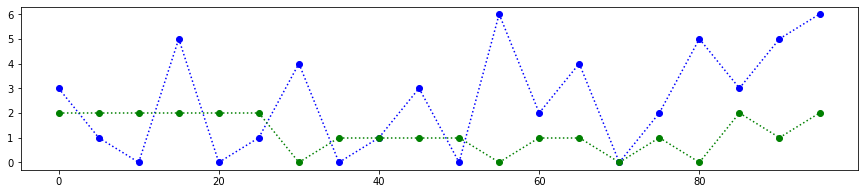

In [48]:
fig= plt.figure(figsize=(15,3))
segments1 = segments(first_line)
show(segments1)
segments2 = segments(second_line)
show(segments2, ':g')
for i in first_line:
    plt.plot(i[0], i[1], 'bo')
for i in second_line:
    plt.plot(i[0], i[1], 'go')

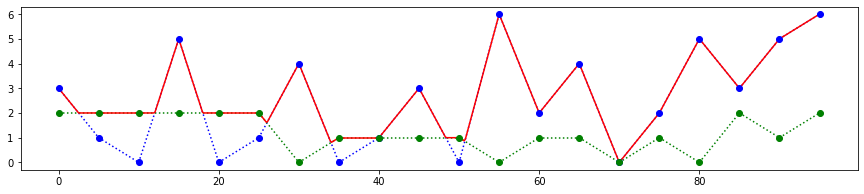

In [50]:
fig= plt.figure(figsize=(15,3))
segments1 = segments(first_line)
show(segments1)
segments2 = segments(second_line)
show(segments2, ':g')

res_y = []
temp = []
for xy1, xy2 in zip(segments1, segments2):
    for el1, el2 in zip(xy1[1], xy2[1]):
        temp.append(max(el1, el2))
    plt.plot(xy1[0], temp, 'r')
    res_y.append(temp)
    temp.clear()
for i in first_line:
    plt.plot(i[0], i[1], 'bo')
for i in second_line:
    plt.plot(i[0], i[1], 'go')